Imports

In [140]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

We import our data from Statistics Denmark (consumer price index and gross unemployment rate):

In [141]:
CPI = DstApi('PRIS111') 
GUR = DstApi('AUS07') 

A quick overview of the available data:

In [142]:
tabsum1 = CPI.tablesummary(language='en')
display(tabsum1)
tabsum2 = GUR.tablesummary(language='en')
display(tabsum2)

Table PRIS111: Consumer price index by commodity group, unit and time
Last update: 2023-04-11T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VAREGR,384,000000,"00 Consumer price index, total",151000,15.1 Overall Consumer Price Index excl. energy,False
1,ENHED,3,100,Index,300,Percentage change compared to same month the y...,False
2,Tid,267,2001M01,2001M01,2023M03,2023M03,True


Table AUS07: Unemployed persons (seasonally adjusted) by benefits, sex and age, seasonal adjustment and actual figures and time
Last update: 2023-03-30T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,YD,15,TOT,Gross unemployment,O60,60 years and more,False
1,SAESONFAK,4,9,Seasonally adjusted figures in percent of the ...,24,Enumerated actual figures,False
2,Tid,194,2007M01,2007M01,2023M02,2023M02,True


In [143]:
# The available values for a each variable in data from CPI: 
for variable in tabsum1['variable name']:
    print(variable+':')
    display(CPI.variable_levels(variable, language='en'))

VAREGR:


,id,text
0,000000,"00 Consumer price index, total"
1,010000,01 Food and non-alcoholic beverages
2,011000,01.1 Food
3,011100,01.1.1 Bread and cereals
4,011110,01.1.1.1 Rice
...,...,...
379,127030,12.7.0.3 Funeral services
380,131000,13.1 Goods (total)
381,132000,13.2 Services (total)
382,141000,14.1 Overall Consumer Price Index - excl. ener...


ENHED:


,id,text
0,100,Index
1,200,Percentage change compared to previous month (...
2,300,Percentage change compared to same month the y...


Tid:


,id,text
0,2001M01,2001M01
1,2001M02,2001M02
2,2001M03,2001M03
3,2001M04,2001M04
4,2001M05,2001M05
...,...,...
262,2022M11,2022M11
263,2022M12,2022M12
264,2023M01,2023M01
265,2023M02,2023M02


In [144]:
# The available values for a each variable in data from GUR: 
for variable in tabsum2['variable name']:
    print(variable+':')
    display(GUR.variable_levels(variable, language='en'))

YD:


,id,text
0,TOT,Gross unemployment
1,NET,Net unemployment
2,LDP,Net unemployed recipients of unemployment bene...
3,LKT,Net unemployed recipients of social assistance
4,AKI,Activation total
5,ADP,Activation of persons on unemployment benefits
6,AKT,Activation of persons on social assistance (pr...
7,MEN,Men
8,KVR,Women
9,U25,16-24 years


SAESONFAK:


,id,text
0,9,Seasonally adjusted figures in percent of the ...
1,10,Seasonally adjusted
2,22,Enumerated actual figures in percent of the l...
3,24,Enumerated actual figures


Tid:


,id,text
0,2007M01,2007M01
1,2007M02,2007M02
2,2007M03,2007M03
3,2007M04,2007M04
4,2007M05,2007M05
...,...,...
189,2022M10,2022M10
190,2022M11,2022M11
191,2022M12,2022M12
192,2023M01,2023M01


Define a param dictionary detailing the data we want

In [145]:
# The _define_base_params -method gives us a nice template (selects all available data) for CPI data
paramsC = CPI._define_base_params(language='en')
paramsC

{'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [146]:
# The _define_base_params -method gives us a nice template (selects all available data) for GUR data
paramsG = GUR._define_base_params(language='en')
paramsG

{'table': 'aus07',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'YD', 'values': ['*']},
  {'code': 'SAESONFAK', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

We edit the above, such that we get the specific data we want from the CPI and GUR data

In [165]:
params1 = {'table': 'pris111',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'VAREGR', 'values': ['021300']},
  {'code': 'ENHED', 'values': ['300']},
  {'code': 'Tid', 'values': ['>=2007M01<=2023M02']}]}

In [153]:
params2 = {'table': 'aus07',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'YD', 'values': ['TOT','MEN','KVR']},
  {'code': 'SAESONFAK', 'values': ['9']},
  {'code': 'Tid', 'values': ['*']}]}

In [166]:
CPI_api = CPI.get_data(params=params1)
CPI_api.head(5)

,VAREGR,ENHED,TID,INDHOLD
0,02.1.3 Beer,Percentage change compared to same month the y...,2007M01,5.9
1,02.1.3 Beer,Percentage change compared to same month the y...,2007M02,3.6
2,02.1.3 Beer,Percentage change compared to same month the y...,2007M03,1.9
3,02.1.3 Beer,Percentage change compared to same month the y...,2007M04,9.9
4,02.1.3 Beer,Percentage change compared to same month the y...,2007M05,3.3


In [167]:
GUR_api = GUR.get_data(params=params2)
GUR_api.head(5)

,YD,SAESONFAK,TID,INDHOLD
0,Women,Seasonally adjusted figures in percent of the ...,2010M12,5.4
1,Men,Seasonally adjusted figures in percent of the ...,2010M12,6.8
2,Gross unemployment,Seasonally adjusted figures in percent of the ...,2010M12,6.1
3,Women,Seasonally adjusted figures in percent of the ...,2011M09,5.8
4,Men,Seasonally adjusted figures in percent of the ...,2011M09,6.0


Merge:

In [185]:
beer = pd.merge(CPI_api, GUR_api,on=['TID'], how='outer')
beer.head(5)

,VAREGR,ENHED,TID,INDHOLD_x,YD,SAESONFAK,INDHOLD_y
0,02.1.3 Beer,Percentage change compared to same month the y...,2007M01,5.9,Women,Seasonally adjusted figures in percent of the ...,5.3
1,02.1.3 Beer,Percentage change compared to same month the y...,2007M01,5.9,Men,Seasonally adjusted figures in percent of the ...,3.3
2,02.1.3 Beer,Percentage change compared to same month the y...,2007M01,5.9,Gross unemployment,Seasonally adjusted figures in percent of the ...,4.3
3,02.1.3 Beer,Percentage change compared to same month the y...,2007M02,3.6,Women,Seasonally adjusted figures in percent of the ...,5.1
4,02.1.3 Beer,Percentage change compared to same month the y...,2007M02,3.6,Men,Seasonally adjusted figures in percent of the ...,3.2


Plot for unemployment, :

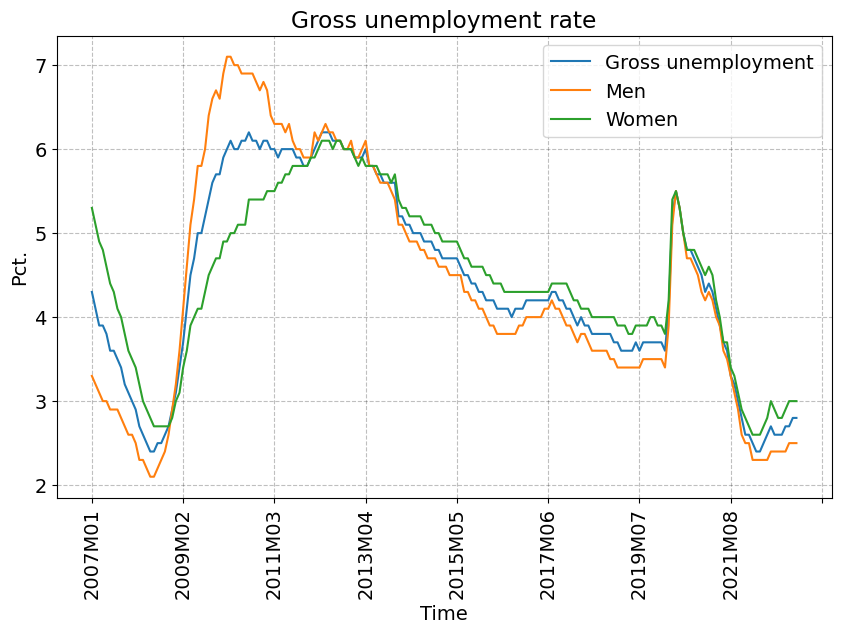

In [226]:
# Create a pivot table
beer_y = beer.pivot_table(index='YD', columns='TID', values='INDHOLD_y')
beer_x = beer.pivot_table(index='YD', columns='TID', values='INDHOLD_x')

Unemployment = ["Gross unemployment", "Men", "Women"]  # Update the list with additional values

fig = plt.figure(figsize=(10, 6))  # Set the plot size to 10 inches width and 6 inches height
ax = fig.add_subplot(1,1,1)

# Plot the curves separately for each value on the primary y-axis
beer_y.loc[Unemployment[0]].plot(x='TID', y='INDHOLD_y', ax=ax, label=Unemployment[0])
beer_y.loc[Unemployment[1]].plot(x='TID', y='INDHOLD_y', ax=ax, label=Unemployment[1])
beer_y.loc[Unemployment[2]].plot(x='TID', y='INDHOLD_y', ax=ax, label=Unemployment[2])

ax.legend(frameon=True)
ax.set_ylabel('Pct.')
ax.set_xlabel('Time')

# Set x-axis labels to be written vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
# Set the title of the plot
ax.set_title('Gross unemployment rate')

plt.show()  # Display the plot

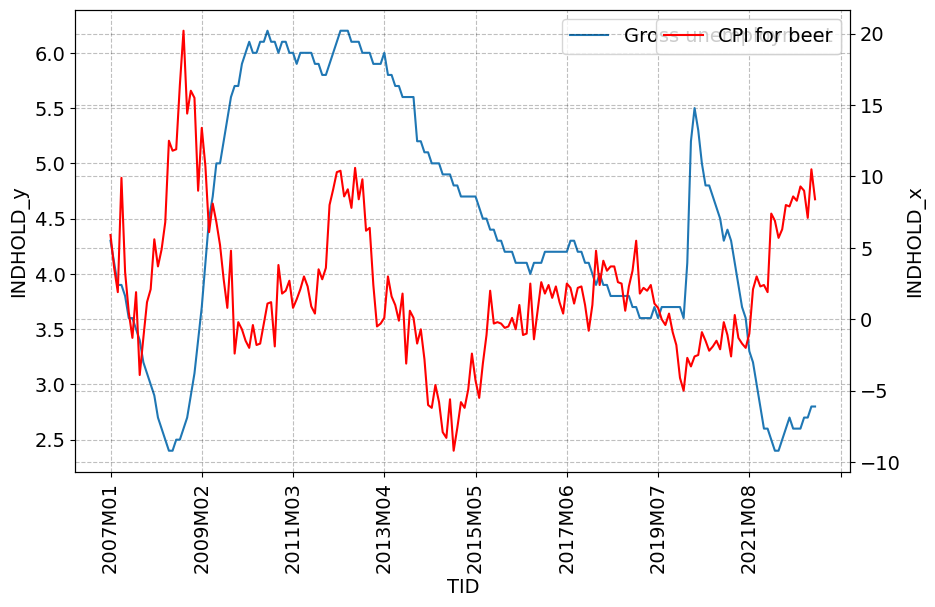

In [228]:
# Create a pivot table
beer_y = beer.pivot_table(index='YD', columns='TID', values='INDHOLD_y')
beer_x = beer.pivot_table(index='YD', columns='TID', values='INDHOLD_x')

Unemployment = ["Gross unemployment"]  # Update the list with additional values

fig = plt.figure(figsize=(10, 6))  # Set the plot size to 10 inches width and 6 inches height
ax = fig.add_subplot(1,1,1)

# Plot the curves separately for each value on the primary y-axis
beer_y.loc[Unemployment[0]].plot(x='TID', y='INDHOLD_y', ax=ax, label=Unemployment[0])

ax.legend(frameon=True)
ax.set_ylabel('INDHOLD_y')

# Set x-axis labels to be written vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot a curve on the secondary y-axis
# You can update the values and label accordingly
beer_x.loc[Unemployment[0]].plot(x='TID', y='INDHOLD_x', ax=ax2, label='CPI for beer', color='red')

ax2.legend(frameon=True)
ax2.set_ylabel('INDHOLD_x')

plt.show()  # Display the plot

In [235]:
CPI_Beer = beer['INDHOLD_x']
GU_rate = beer['INDHOLD_y']

correlation = CPI_Beer.corr(GU_rate)

# Print the correlation coefficient
print("Correlation between column1 and column2: ", correlation)

TypeError: unsupported operand type(s) for /: 'str' and 'int'